1: What is Boosting in Machine Learning? Explain how it improves weak learners.
-> Boosting is an ensemble learning technique that combines multiple weak learners to create a strong predictive model. A weak learner is a model that performs only slightly better than random guessing.

How Boosting Works

Models are trained sequentially

Each new model focuses more on the mistakes made by previous models

Misclassified samples receive higher importance (weights)

Final prediction is a weighted combination of all models

Why Boosting Improves Weak Learners

Forces models to learn hard-to-predict patterns

Reduces bias

Converts simple models (e.g., decision stumps) into high-accuracy systems

End Result

Multiple weak learners together form a highly accurate and robust model.


2: Difference between AdaBoost and Gradient Boosting
-> | Aspect               | AdaBoost                                 | Gradient Boosting                     |
| -------------------- | ---------------------------------------- | ------------------------------------- |
| Training style       | Reweights data samples                   | Fits models on residual errors        |
| Error handling       | Increases weight of misclassified points | Minimizes loss function via gradients |
| Loss function        | Exponential loss                         | Any differentiable loss               |
| Sensitivity to noise | High                                     | Lower (more flexible)                 |


3: How does regularization help in XGBoost?
-> Regularization in XGBoost prevents overfitting by penalizing overly complex models.

Types of Regularization

L1 (alpha) → encourages sparsity

L2 (lambda) → controls weight magnitude

Gamma → penalizes adding new tree splits


4: Why is CatBoost efficient for categorical data?
-> CatBoost handles categorical features natively, without manual encoding.

Key Advantages

Uses ordered target encoding

Prevents target leakage

Handles missing values automatically

Reduces preprocessing effort


5: Real-world applications where boosting is preferred over bagging
-> Boosting is preferred when:

Bias reduction is critical

Data patterns are complex

Examples:

Credit risk prediction

Fraud detection

Medical diagnosis

Customer churn prediction

Recommendation systems




In [1]:
# 6: AdaBoost Classifier on Breast Cancer Dataset

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", accuracy)


AdaBoost Accuracy: 0.9736842105263158


In [2]:
# 7: Gradient Boosting Regressor on California Housing Dataset

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)

# R2 Score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.7756446042829697


In [10]:
# 8: XGBoost Classifier with GridSearchCV

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)


# Grid search
params = {
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(xgb, params, cv=3)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Params: {'learning_rate': 0.1}
Accuracy: 0.956140350877193


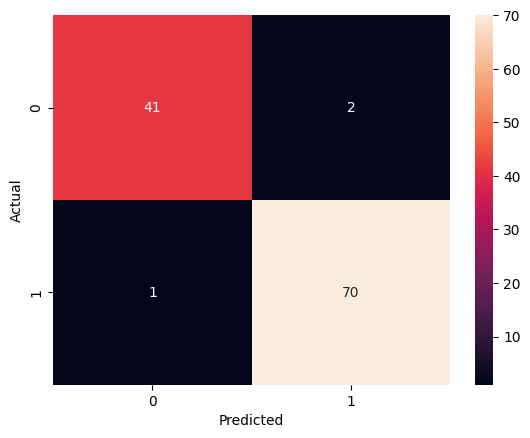

In [13]:
# 9: CatBoost Classifier & Confusion Matrix

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


10: FinTech Loan Default Prediction – Boosting Pipeline
Step-by-step Pipeline
1. Data Preprocessing

Handle missing values (CatBoost handles automatically)

Identify categorical & numeric features

Encode categorical variables (if not using CatBoost)

2. Model Choice

CatBoost (best for mixed data + missing values)

XGBoost if performance tuning is needed

3. Hyperparameter Tuning

GridSearch / RandomizedSearch

Tune learning rate, depth, iterations

4. Evaluation Metrics

Precision & Recall (imbalanced data)

ROC-AUC

F1-score

5. Business Benefits

Reduced loan defaults

Better risk assessment

Higher profitability

Automated decision-making

End Result

A robust, scalable, and business-aligned credit risk model.